# **Use the following nutrition dataset:**



In [ ]:
#read in the data file:
import pandas as pd
nutrition = pd.read_csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project4/problem2/nutritionSubset.csv");
nutrition

,foodItem,weightInGrams,saturatedFat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


# **Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.**

In [ ]:
nutrition.sort_values(by='saturatedFat', ascending =False).head(5)

,foodItem,weightInGrams,saturatedFat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


Comparing food items of different sizes means that the larger items will most likely have larger amounts of saturatedFat and cholesterol.  It is important to keep this in mind because if a small item is compared to a large item there will be a big difference in the results.

# **Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?**

In [ ]:
#make a new column and put the saturated_fat_per_gram into it:
nutrition['saturated_fat_per_gram'] = nutrition.apply(
    lambda row: row['saturatedFat']/row['weightInGrams'],  
    axis = 1)
#print the first five in descending order:
nutrition.sort_values(by='saturated_fat_per_gram', ascending =False).head(5)

,foodItem,weightInGrams,saturatedFat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


Butter; Salted, 1 TBSP has the most saturated fat per gram

# **Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale?**

In [ ]:
#import & initialize the standard scaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scale "saturated_fat_per_gram" column and put values into new column:
nutrition[["saturated_fat_per_gram_scaled"]] = scaler.fit_transform(nutrition[["saturated_fat_per_gram"]])

In [ ]:
#check if mean = 0 after standardization:
m1 = nutrition['saturated_fat_per_gram_scaled'].mean()
print("The new shifted mean: %6.6f" % (m1))

The new shifted mean: 0.000000


In [ ]:
#make & print new df with high end outliers for saturated_fat_per_gram:
nutrition_outliers = nutrition.query('(saturated_fat_per_gram_scaled > 3)')
nutrition_outliers.sort_values(by='saturated_fat_per_gram_scaled', ascending =False)

,foodItem,weightInGrams,saturatedFat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_scaled
908,BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.507143,7.110475
909,BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.507143,7.110475
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000,7.002408
913,BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.500000,7.002408
899,LARD 1 TBSP,13.00,5.1,12,0.392308,5.373078
890,LARD 1 CUP,205.00,80.4,195,0.392195,5.371375
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000,4.732985
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460,4.240676


In [ ]:
#make & print new df with low end outliers for saturated_fat_per_gram:
nutrition_outliers2 = nutrition.query('(saturated_fat_per_gram_scaled < -3)')
nutrition_outliers2.sort_values(by='saturated_fat_per_gram_scaled', ascending =True)
#seems like there are no outliers below -3 standard deviations

,foodItem,weightInGrams,saturatedFat,cholesterol,saturated_fat_per_gram,saturated_fat_per_gram_scaled


# **Create a density plot for saturated_ fat_ per_gram.**

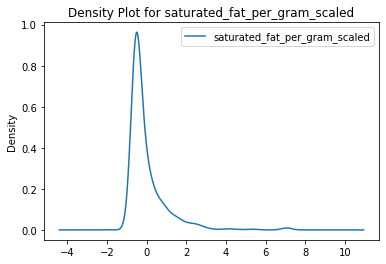

In [ ]:
#make a new df with just "saturated_fat_per_gram_scaled" :
sat = [nutrition["saturated_fat_per_gram_scaled"]]
headers = ["saturated_fat_per_gram_scaled"]
sat2 = pd.concat(sat, axis=1, keys=headers)
#make a density plot for new df:
import matplotlib.pyplot as plt
sat2.plot.density()
plt.title('Density Plot for saturated_fat_per_gram_scaled')
plt.show()